In [1]:
import os
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pgeocode
import pickle
from pandas_profiling import ProfileReport
import seaborn as sns
from scipy import stats




In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,10)

In [3]:
base_dir = '/home/cvanderwalt/workspace/repos/ecom/'

In [4]:
data = pd.read_csv(os.path.join(base_dir, 'data/data.csv'))
data


InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
134694    547862     22087             PAPER BUNTING WHITE LACE        12   
134695    547862     21206       STRAWBERRY HONEYCOMB  GARLAND          4   
134696    547862     21912             VINTAGE SNAKES & LADDERS         1   
134697    547863     22957  SET 3 PAPER VINTAGE CHICK PAPER EGG         6   
134698    547863     21731        RED TOADSTOOL LED NIGHT LIGHT        12   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
134694  3/27/2011 12:54       2.95     12841.0  United Kingdom  
134695  3/27/2011 12:54       1.65     12841.0  United Kingdom  
134696  3/27/2011 12:54       3.75     12841.0  United Kingdom  
134697  3/27/2011 13:07       2.95     12728.0          France  
134698        3/27/2011        NaN         NaN             NaN  

[134699 rows x 8 columns]

/home/cvanderwalt/anaconda3/envs/freight/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


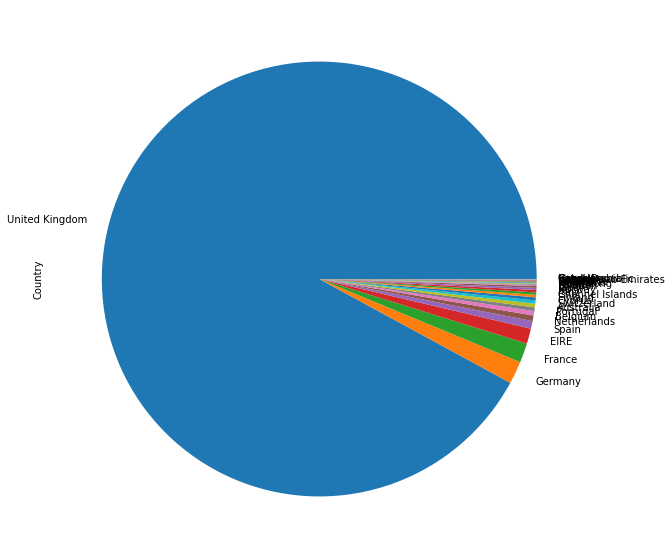

In [5]:
data.Country.value_counts(normalize=True).plot.pie()
plt.show()


In [6]:
data.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)


StockCode
84077     13757
21212     12781
85123A    12213
85099B    12047
22197      9117
          ...  
22617     -2006
84598     -2122
72732     -2472
72140F    -5368
84347     -6953
Name: Quantity, Length: 3254, dtype: int64

In [7]:
data[data['Quantity'] < 0]

InvoiceNo StockCode                         Description  Quantity  \
141      C536379         D                            Discount        -1   
154      C536383    35004C     SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556      PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984    PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983    PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                                 ...       ...   
134566   C547857     82483  WOOD 2 DRAWER CABINET WHITE FINISH        -2   
134567   C547858     22797     CHEST OF DRAWERS GINGHAM HEART         -1   
134568   C547858     23178                    JAM CLOCK MAGNET        -1   
134569   C547858     22720   SET OF 3 CAKE TINS PANTRY DESIGN         -1   
134570   C547859    85027L       FRENCH CHATEAU LARGE PLATTER         -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/2010 9:41      27.50     14527.0  United Kingdom  
154      12/1/2010 9:49       4.65     15311.0  United Kingdom  
235     12/1/2010 10:24       1.65     17548.0  United Kingdom  
236     12/1/2010 10:24       0.29     17548.0  United Kingdom  
237     12/1/2010 10:24       0.29     17548.0  United Kingdom  
...                 ...        ...         ...             ...  
134566  3/27/2011 12:14       6.95     13050.0  United Kingdom  
134567  3/27/2011 12:16      16.95     14911.0            EIRE  
134568  3/27/2011 12:16       2.89     14911.0            EIRE  
134569  3/27/2011 12:16       4.95     14911.0            EIRE  
134570  3/27/2011 12:16       1.95     13725.0  United Kingdom  

[2738 rows x 8 columns]

## Process time

In [8]:
data['InvoiceDate'] = data['InvoiceDate'].apply(lambda x :datetime.strptime(str(x),'%m/%d/%Y %H:%M') if ':' in x else datetime.strptime(str(x),'%m/%d/%Y'))
data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
134694    547862     22087             PAPER BUNTING WHITE LACE        12   
134695    547862     21206       STRAWBERRY HONEYCOMB  GARLAND          4   
134696    547862     21912             VINTAGE SNAKES & LADDERS         1   
134697    547863     22957  SET 3 PAPER VINTAGE CHICK PAPER EGG         6   
134698    547863     21731        RED TOADSTOOL LED NIGHT LIGHT        12   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
134694 2011-03-27 12:54:00       2.95     12841.0  United Kingdom  
134695 2011-03-27 12:54:00       1.65     12841.0  United Kingdom  
134696 2011-03-27 12:54:00       3.75     12841.0  United Kingdom  
134697 2011-03-27 13:07:00       2.95     12728.0          France  
134698 2011-03-27 00:00:00        NaN         NaN             NaN  

[134699 rows x 8 columns]

In [9]:
data['year'] = data['InvoiceDate'].apply(lambda x :x.year)
data['month'] = data['InvoiceDate'].apply(lambda x :x.month)
data['week'] = data['InvoiceDate'].apply(lambda x :x.week)
data['day'] = data['InvoiceDate'].apply(lambda x :x.day)
data['weekday'] = data['InvoiceDate'].apply(lambda x :x.weekday())

data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
134694    547862     22087             PAPER BUNTING WHITE LACE        12   
134695    547862     21206       STRAWBERRY HONEYCOMB  GARLAND          4   
134696    547862     21912             VINTAGE SNAKES & LADDERS         1   
134697    547863     22957  SET 3 PAPER VINTAGE CHICK PAPER EGG         6   
134698    547863     21731        RED TOADSTOOL LED NIGHT LIGHT        12   

               InvoiceDate  UnitPrice  CustomerID         Country  year  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
...                    ...        ...         ...             ...   ...   
134694 2011-03-27 12:54:00       2.95     12841.0  United Kingdom  2011   
134695 2011-03-27 12:54:00       1.65     12841.0  United Kingdom  2011   
134696 2011-03-27 12:54:00       3.75     12841.0  United Kingdom  2011   
134697 2011-03-27 13:07:00       2.95     12728.0          France  2011   
134698 2011-03-27 00:00:00        NaN         NaN             NaN  2011   

        month  week  day  weekday  
0          12    48    1        2  
1          12    48    1        2  
2          12    48    1        2  
3          12    48    1        2  
4          12    48    1        2  
...       ...   ...  ...      ...  
134694      3    12   27        6  
134695      3    12   27        6  
134696      3    12   27        6  
134697      3    12   27        6  
134698      3    12   27        6  

[134699 rows x 13 columns]

In [10]:
data_weekly = data.groupby(['year','month','week']).sum()['Quantity'].reset_index()

<BarContainer object of 18 artists>

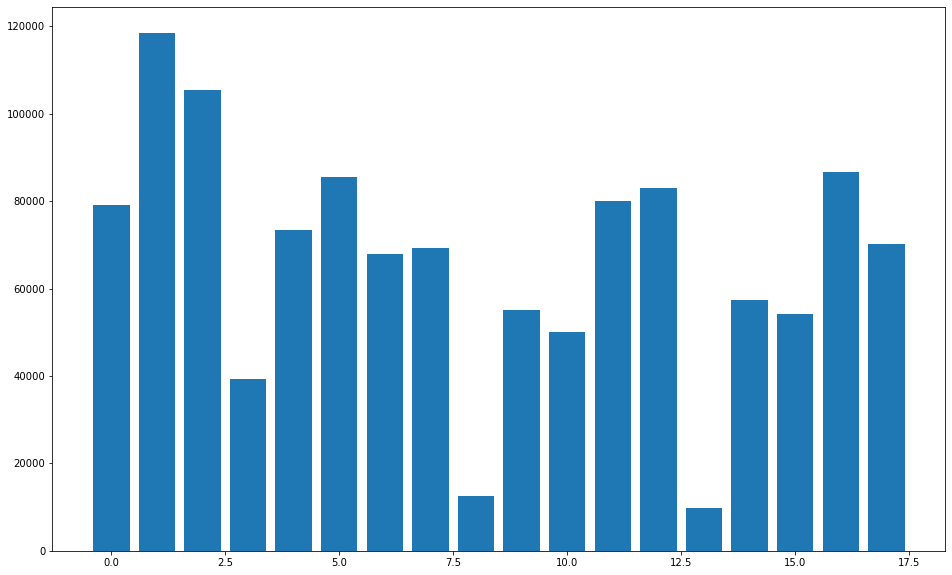

In [11]:
plt.bar(data_weekly.index, data_weekly.Quantity)

In [12]:
data.describe()

Quantity      UnitPrice    CustomerID           year  \
count  134699.000000  134698.000000  91743.000000  134699.000000   
mean        8.890875       5.181172  15294.861363    2010.684623   
std       291.302873     107.287453   1740.772767       0.464668   
min    -74215.000000       0.000000  12346.000000    2010.000000   
25%         1.000000       1.250000  13869.000000    2010.000000   
50%         3.000000       2.460000  15206.000000    2011.000000   
75%        10.000000       4.210000  16891.000000    2011.000000   
max     74215.000000   16888.020000  18283.000000    2011.000000   

               month           week            day        weekday  
count  134699.000000  134699.000000  134699.000000  134699.000000  
mean        5.110840      19.929732      13.627495       2.378392  
std         4.726467      20.115412       7.861179       1.814246  
min         1.000000       1.000000       1.000000       0.000000  
25%         1.000000       5.000000       7.000000       1.000000  
50%         3.000000       9.000000      13.000000       2.000000  
75%        12.000000      48.000000      20.000000       4.000000  
max        12.000000      51.000000      31.000000       6.000000

## Filter outliers

In [13]:

data2 = data.copy()
data2 = data2[(np.abs(stats.zscore(data2['Quantity'])) < 3)]


In [14]:
data2

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
134694    547862     22087             PAPER BUNTING WHITE LACE        12   
134695    547862     21206       STRAWBERRY HONEYCOMB  GARLAND          4   
134696    547862     21912             VINTAGE SNAKES & LADDERS         1   
134697    547863     22957  SET 3 PAPER VINTAGE CHICK PAPER EGG         6   
134698    547863     21731        RED TOADSTOOL LED NIGHT LIGHT        12   

               InvoiceDate  UnitPrice  CustomerID         Country  year  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
...                    ...        ...         ...             ...   ...   
134694 2011-03-27 12:54:00       2.95     12841.0  United Kingdom  2011   
134695 2011-03-27 12:54:00       1.65     12841.0  United Kingdom  2011   
134696 2011-03-27 12:54:00       3.75     12841.0  United Kingdom  2011   
134697 2011-03-27 13:07:00       2.95     12728.0          France  2011   
134698 2011-03-27 00:00:00        NaN         NaN             NaN  2011   

        month  week  day  weekday  
0          12    48    1        2  
1          12    48    1        2  
2          12    48    1        2  
3          12    48    1        2  
4          12    48    1        2  
...       ...   ...  ...      ...  
134694      3    12   27        6  
134695      3    12   27        6  
134696      3    12   27        6  
134697      3    12   27        6  
134698      3    12   27        6  

[134635 rows x 13 columns]

In [15]:
data3 = data2.dropna()
data3 = data3[(np.abs(stats.zscore(data3['UnitPrice'])) < 10)]
len(data3)

91653

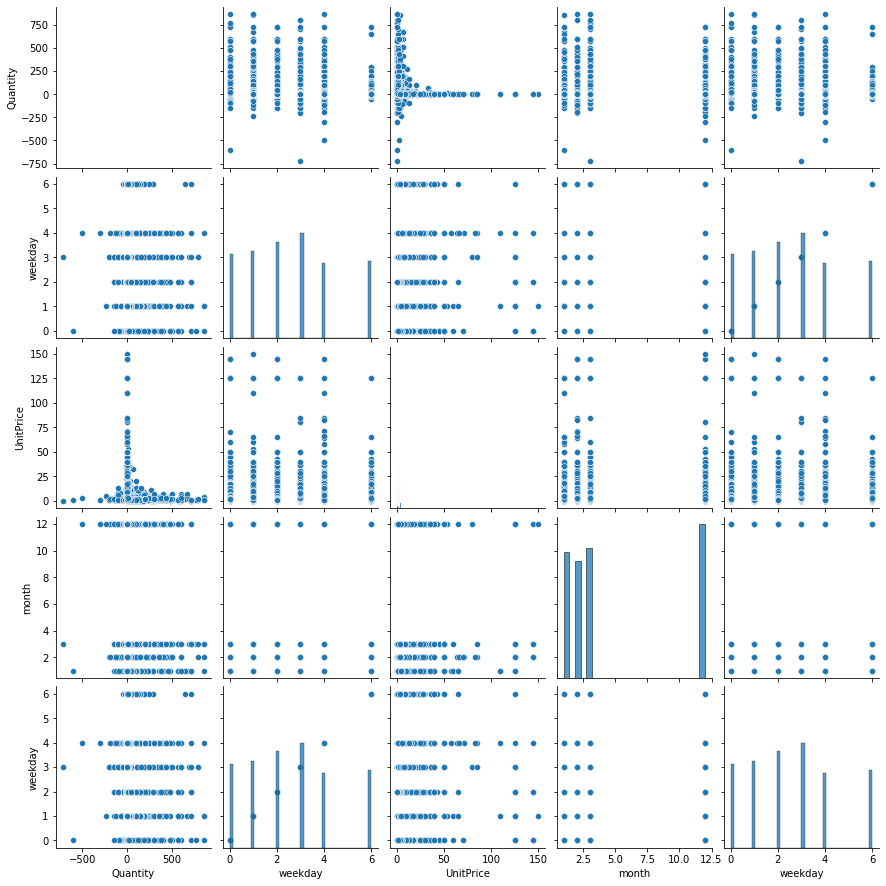

In [20]:
sns.pairplot(data = data3, vars=['Quantity','weekday','UnitPrice','month','weekday'])
plt.show()


In [17]:
profile = ProfileReport(data2, title="Pandas Profiling Report for Sales Data", explorative=True)


In [18]:
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
profile.to_file("sales_feature_report.html")


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]